- Tanguy Malandain
- Hugo Deplagne
- Pierre Litoux
- Param Dave

# Reaffectation active

### Import modules

In [1]:
import pandas as pd

from utils import feature_importance
from utils import select_top_k_features
from utils import train_and_evaluate
from utils import plot_accuracy

### Load dataframe

In [2]:
df = pd.read_csv("data/clusters.csv")
df.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102,cluster_usage,cluster_attitude
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,0.0,...,1,2,1.0,1,1,24,0,4,1,2
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,0.0,...,1,2,1.0,4,1,50,0,1,4,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,0.0,...,2,1,1.0,3,2,37,1,3,4,2
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,0.0,...,1,2,1.0,5,3,63,0,2,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,0.0,1.0,...,2,1,1.0,3,1,44,1,3,3,2


In [3]:
df_usage = df.iloc[:, 0:30].copy()
df_usage["cluster"] = df["cluster_usage"]

In [4]:
df_usage.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,0.0,...,2,2,2,2,2,2,2,2,2,1
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,0.0,...,4,4,4,4,4,4,4,4,4,4
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,0.0,...,4,4,4,4,4,4,4,4,4,4
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,0.0,...,4,4,5,5,5,5,5,4,4,0
4,5,MET20_1869308,0.812315,0,1,0,0,2,0.0,1.0,...,4,4,4,4,4,4,4,4,4,3


In [5]:
df_attitude = df.iloc[:, list(range(3)) + list(range(30, 67))].copy()
df_attitude["cluster"] = df["cluster_attitude"]

In [6]:
df_attitude.head()

,cle,Respondent_ID,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,...,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,MET20_999999996,2.501255,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,MET20_98888888,0.722914,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,1
2,3,MET20_1978307,1.039611,3,2,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2
3,4,MET20_1302078,0.976590,1,2,2,2,3,2,3,...,1,2,3,3,3,2,2,1,2,2
4,5,MET20_1869308,0.812315,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


## Feature selection

### For usage

Get feature importance with a random forest.

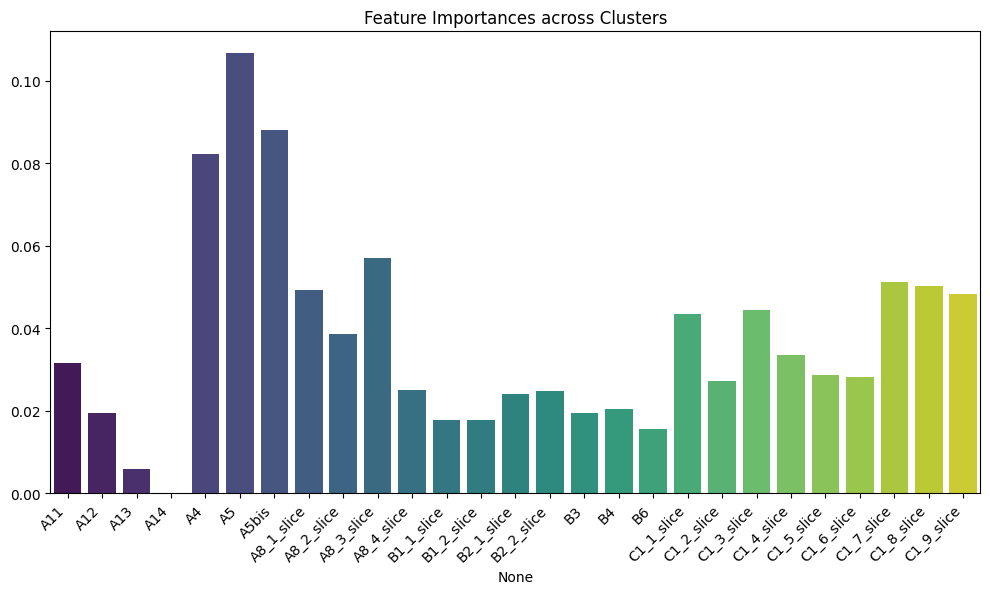

In [7]:
importances = feature_importance(df_usage)

Select the top features.

In [8]:

# Example Usage:
# Assuming importances is a list of floats and feature_names is a list of feature names
# Replace 5 with the desired number of top features to select
top_k_features = select_top_k_features(importances, df_usage.iloc[:, 3:-1].columns, k=10)
print("Top Features:", top_k_features)


Top Features: ['A5', 'A5bis', 'A4', 'A8_3_slice', 'C1_7_slice', 'C1_8_slice', 'A8_1_slice', 'C1_9_slice', 'C1_3_slice', 'C1_1_slice']


Implement XGB classifier.


Accuracy Score: 0.959


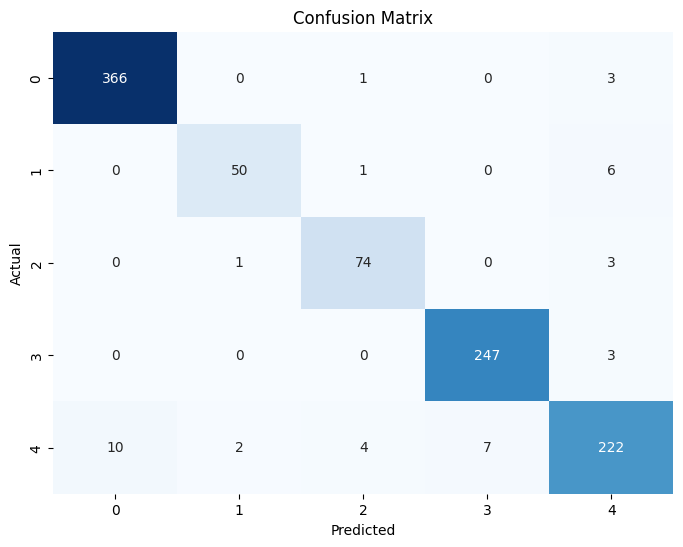

In [9]:
accuracy = train_and_evaluate(df_usage, df_usage.iloc[:, 3:-1].columns)

Le modele de classification a une precision d'environ 96%.


Nous allons maintenant entrainer avec seulement la meilleure feature et iterativement rajouter la suite des meilleures features.

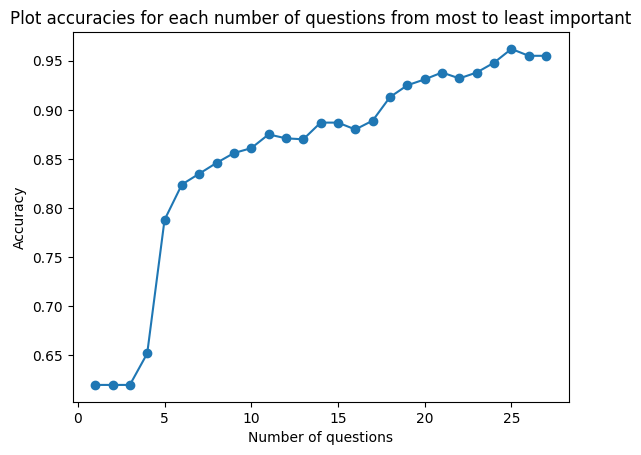

In [10]:
plot_accuracy(df_usage, importances, df_usage.iloc[:, 3:-1].columns)

Nous observons une forte croissance de notre precision a partir de la 5eme question.  

Arbitrairement, on peut etablir que les 7 meilleurs questions sont suffisant pour avoir une bonne precision.  

Ces 7 questions sont les **golden questions** parmi les 27 questions d'usage au total.

In [11]:
select_top_k_features(importances, df_usage.iloc[:, 3:-1].columns, 7)

['A5', 'A5bis', 'A4', 'A8_3_slice', 'C1_7_slice', 'C1_8_slice', 'A8_1_slice']

Voici les 7 **golden questions**.
- `A5`: Taille du jardin
- `A5bis`: Taille de la terrasse/balcon
- `A4`: TYPE D'ESPACE
- `A8_3_slice`: Temps passé à l'entretien de l'espace extérieur En automne
- `C1_7_slice`: Fréquence consultation sites dédiés au jardinage Des forums de discussion sur Internet, centrés sur le jardinage, la décoration ou l’entretien des espaces extérieurs
- `C1_8_slice`: Fréquence consultation sites dédiés au jardinage Des sites Internet de fabricants ou de marques de produits pour d’aménagement ou d’entretien des espaces extérieurs
- `A8_1_slice`:  Temps passé à l'entretien de l'espace extérieur Au printemps


Accuracy Score: 0.835


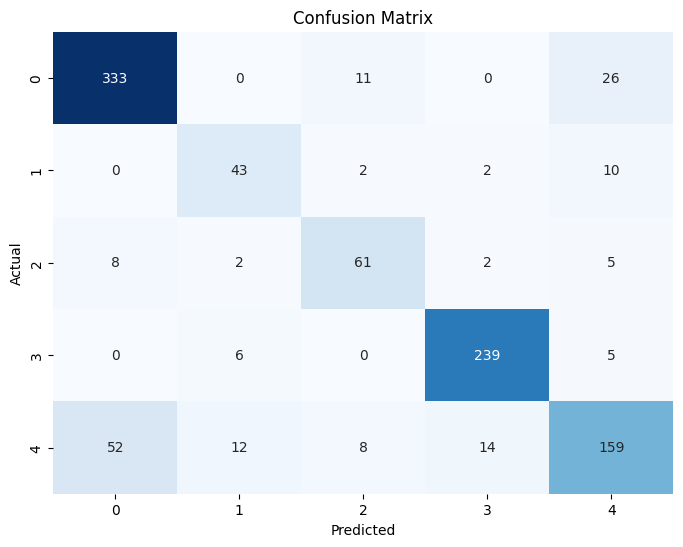

0.835

In [12]:
train_and_evaluate(df_usage, ['A5', 'A5bis', 'A4', 'A8_3_slice', 'C1_7_slice', 'C1_8_slice', 'A8_1_slice'])

Avec seulement les **golden questions**, nous avons une precision de 83.5%. Ceci nous montre que ces questions sont largement suffisantes pour la classification. Ainsi, ces questions seront assez pour la reaffectation.

### For attitude

Regardons les features les plus importantes a partir du random forest.

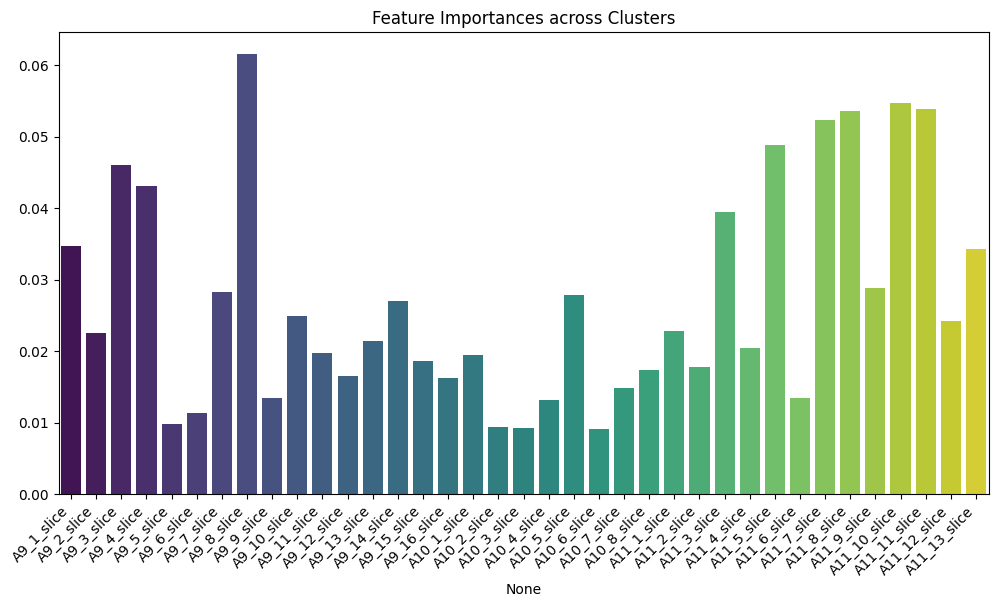

In [13]:
importances = feature_importance(df_attitude)

Entrainons notre model de classification sur toutes les features.


Accuracy Score: 0.931


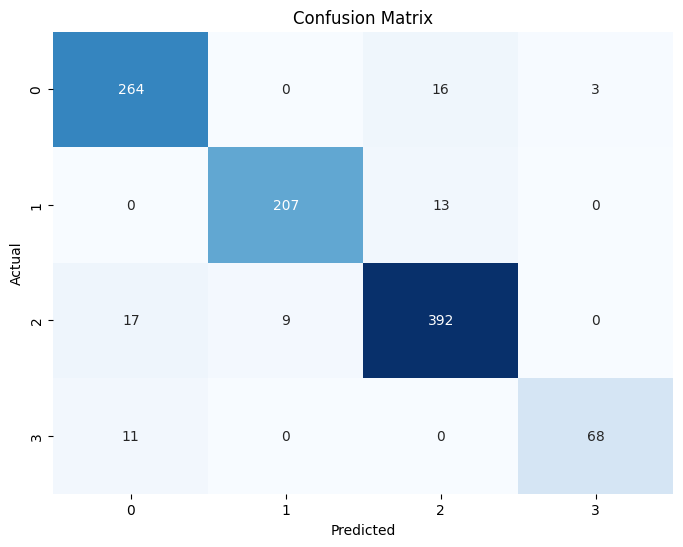

In [14]:
accuracy = train_and_evaluate(df_attitude, df_attitude.iloc[:, 3:-1].columns)

Nous obtenons une precision de 93.1%.  

Regardons maintenant la precision en prenant un nombre de feature variable.

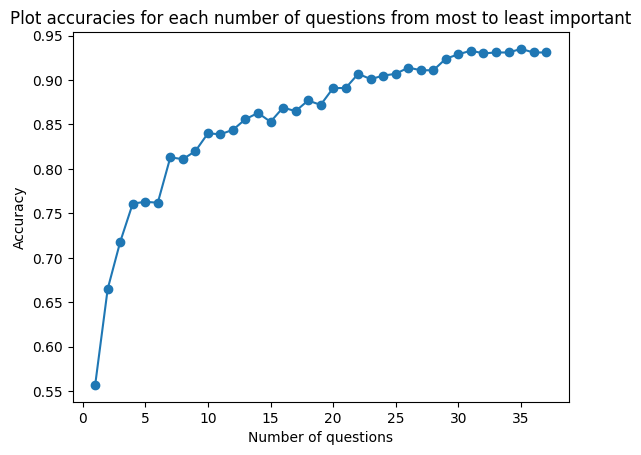

In [15]:
plot_accuracy(df_attitude, importances, df_attitude.iloc[:, 3:-1].columns)

Nous observons une forte augmentation de la precision jusqu'a la question 4 et un autre pic à la question 7.  
Nous pouvons donc egalement choisir arbitrairement 7 **golden questions** parmi les 37 questions sur l'attitude.

In [16]:
select_top_k_features(importances, df_attitude.iloc[:, 3:-1].columns, 7)

['A9_8_slice',
 'A11_10_slice',
 'A11_11_slice',
 'A11_8_slice',
 'A11_7_slice',
 'A11_5_slice',
 'A9_3_slice']

Voici les 7 **golden questions**:
- `A9_8_slice`: Je m’investis beaucoup dans l’aménagement et l’entretien des espaces extérieurs
- `A11_10_slice`: Un moyen de réaliser jusqu’au bout quelque chose de vos propres mains
- `A11_11_slice`: Un moyen de transmettre des connaissances, des pratiques qu’il est indispensable de perpétuer
- `A11_8_slice`: Votre espace favori de loisirs et de liberté
- `A11_7_slice`: Votre contact privilégié avec le vert, la nature
- `A11_5_slice`: Un moyen de se resourcer, de refaire le plein d’énergie
- `A9_3_slice`: Je recherche souvent des informations sur l’aménagement des espaces extérieurs


Accuracy Score: 0.813


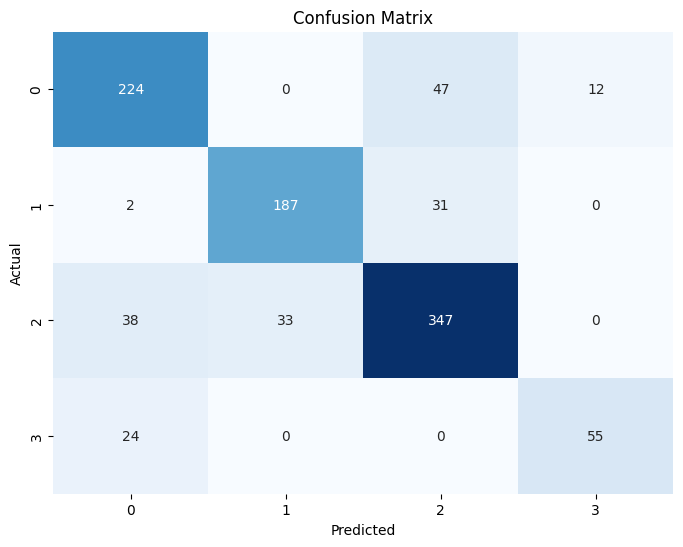

0.813

In [17]:
train_and_evaluate(df_attitude, ['A9_8_slice', 'A11_10_slice', 'A11_11_slice', 'A11_8_slice', 'A11_7_slice', 'A11_5_slice', 'A9_3_slice'])

Avec seulement les **golden questions**, nous avons une precision de 81.3%. Ceci nous montre que ces questions sont largement suffisantes pour la classification. Ainsi, ces questions seront assez pour la reaffectation.